BEA Regional price parities (DOWNLOAD LOCATION)
- https://www.bea.gov/data/prices-inflation/regional-price-parities-state-and-metro-area
- https://apps.bea.gov/itable/iTable.cfm?ReqID=70&step=1
- how RPP and real personal income are computed: https://www.bea.gov/system/files/methodologies/RPP2020-methodology_1.pdf


Other sources
- numbeo ranks COL for top ~500 in world https://www.numbeo.com/cost-of-living/rankings_current.jsp


Real Personal Income:
- Real personal income in constant (2012) dollars for a region begins with current-dollar personal income
divided by its RPP for a given year and balanced so that the sum of personal income remains the same
before and after the adjustment.17 The balancing uses a factor equal to sum of the adjusted income
divided by the sum of the current-dollar income.

Adjustment factor
- the adjusted data are divided by a balancing factor equal to the ratio of the adjusted personal income sum to the unadjusted personal income sum.

In [1]:
%load_ext autoreload
%autoreload 2

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm.autonotebook import tqdm
from postdocsalary.paths import DATA_DIR, ensure_dir
import urllib.request

In [22]:
income_df = pd.read_csv(DATA_DIR / 'income' / 'income.csv', skiprows=4)

In [23]:
income_df.Description.values[:20]

array(['Real personal income (thousands of chained (2012) dollars)',
       'Real per capita personal income (chained (2012) dollars) 2/',
       'Real personal income (thousands of chained (2012) dollars)',
       'Real per capita personal income (chained (2012) dollars) 2/',
       'Real personal income (thousands of chained (2012) dollars)',
       'Real per capita personal income (chained (2012) dollars) 2/',
       'Real personal income (thousands of chained (2012) dollars)',
       'Real per capita personal income (chained (2012) dollars) 2/',
       'Real personal income (thousands of chained (2012) dollars)',
       'Real per capita personal income (chained (2012) dollars) 2/',
       'Real personal income (thousands of chained (2012) dollars)',
       'Real per capita personal income (chained (2012) dollars) 2/',
       'Real personal income (thousands of chained (2012) dollars)',
       'Real per capita personal income (chained (2012) dollars) 2/',
       'Real personal incom

In [24]:
income_df[income_df.Description == 'Real per capita personal income (chained (2012) dollars) 2/'].sort_values(by='2019', ascending=False)[:10]

,GeoFips,GeoName,LineCode,Description,2019
461,33260,"Midland, TX (Metropolitan Statistical Area)",2.0,Real per capita personal income (chained (2012...,119691.0
97,14860,"Bridgeport-Stamford-Norwalk, CT (Metropolitan ...",2.0,Real per capita personal income (chained (2012...,99168.0
493,34940,"Naples-Marco Island, FL (Metropolitan Statisti...",2.0,Real per capita personal income (chained (2012...,90469.0
629,41940,"San Jose-Sunnyvale-Santa Clara, CA (Metropolit...",2.0,Real per capita personal income (chained (2012...,82718.0
647,42680,"Sebastian-Vero Beach, FL (Metropolitan Statist...",2.0,Real per capita personal income (chained (2012...,79974.0
627,41860,"San Francisco-Oakland-Berkeley, CA (Metropolit...",2.0,Real per capita personal income (chained (2012...,71668.0
121,16220,"Casper, WY (Metropolitan Statistical Area)",2.0,Real per capita personal income (chained (2012...,71287.0
241,22220,"Fayetteville-Springdale-Rogers, AR (Metropolit...",2.0,Real per capita personal income (chained (2012...,70600.0
55,12700,"Barnstable Town, MA (Metropolitan Statistical ...",2.0,Real per capita personal income (chained (2012...,66933.0
91,14500,"Boulder, CO (Metropolitan Statistical Area)",2.0,Real per capita personal income (chained (2012...,65888.0


In [25]:
income_df = income_df[income_df.Description == 'Real per capita personal income (chained (2012) dollars) 2/'] 

In [26]:
income_df["RPI_per_capita"] = income_df["2019"]

In [27]:
cost_of_living_df = pd.read_csv(DATA_DIR / 'BEA_price_parity' / 'BEA-cost-of-living-comparison.csv', skiprows=4)

In [28]:
cost_of_living_df = cost_of_living_df[cost_of_living_df.Description == "RPPs: All items"]
cost_of_living_df['RPPs'] = cost_of_living_df['2019']

In [30]:
income_by_COL = cost_of_living_df[['RPPs', 'GeoName']].merge(income_df[['RPI_per_capita', 'GeoName']], on='GeoName')

In [31]:
income_by_COL[:10]

,RPPs,GeoName,RPI_per_capita
0,100.0,United States,51424.0
1,90.3,"Abilene, TX (Metropolitan Statistical Area)",46336.0
2,90.0,"Akron, OH (Metropolitan Statistical Area)",52131.0
3,82.8,"Albany, GA (Metropolitan Statistical Area)",44279.0
4,98.0,"Albany-Lebanon, OR (Metropolitan Statistical A...",42018.0
5,99.3,"Albany-Schenectady-Troy, NY (Metropolitan Stat...",56206.0
6,93.6,"Albuquerque, NM (Metropolitan Statistical Area)",43146.0
7,85.4,"Alexandria, LA (Metropolitan Statistical Area)",47769.0
8,98.6,"Allentown-Bethlehem-Easton, PA-NJ (Metropolita...",51833.0
9,90.1,"Altoona, PA (Metropolitan Statistical Area)",49231.0


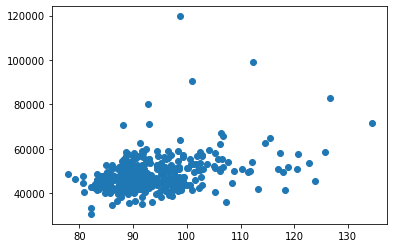

In [32]:
plt.scatter(income_by_COL.RPPs, income_by_COL.RPI_per_capita)

In [33]:
import scipy.stats

In [34]:
scipy.stats.pearsonr(income_by_COL.RPPs, income_by_COL.RPI_per_capita)

(0.3520702422722458, 1.372784189445249e-12)